분석 순서
1. 데이터 살펴보기
2. CNN 적용


# CNN을 선택한 이유
  
CNN은 이미지 인식과 음석 인식 등 다양한 곳에서 사용되는데, 특히 이미지 인식 분야에서 딥러닝을 활용한 기법은 거의 다 CNN을 기초로 한다.
지금까지는 완전연결(Affine) 신경망을 사용했다.

완전연결 계층에서는 인접하는 계층의 뉴런이 모두 연결되고 출력의 수는 임의로 정할 수 있다.

완전연경 계층을 사용하면 되지 않는가?

완전연결 계층의 문제점은 무엇인가?

바로 '데이터의 형상이 무시'된다는 사실이다.

예를 들어보면, 이미지의 경우 (가로,세로,색상)으로 구성된 3차원 데이터이다.

그러나 완전연결 계층에 입력할 때는 3차원 데이터를 1차원으로 평탄화(flatten=true)를 해줘야 한다.

이미지의 3차원 형상에는 중요한 공간적 정보가 있다. 

예를들어 공간적으로 가까운 픽셀은 값이 비슷하거나, 색상이 밀접하게 관련되어있다.


이러한 3차원 속에서의 패턴이 완전연결 계층에서는 모두 무시하고 동등한 뉴련으로 취급하게 된다.
한편 합성곱 계층은 이 형상을 유지하므로, 이미지를 제대로 이해할 수 있다.

CNN에서는 합성곱 계층의 입출력 데이터를 특징 맵(feature map)이라고도 한다.

합성곱 연산은 이미지 처리에서 말하는 필터연산에 해당한다.

필터는 커널이라고도 한다.




결과 = 가중치

결과의 크기 = 입력-커널+1 




합성곱 연산은 필터의 윈도우(window)를 일정 간격으로 이동해가며 입력 데이터에 적용한다.

대응하는 원소끼리 곱한 후 그 총합을 구한다.(단일 곱센-누산 FMA)

그 결과를 출력의 해당 장소에 저장한다.

CNN에서는 필터의 매개변수가 그동안의 '가중치'에 해당한다.

물론 CNN에도 편향이 존재한다.

편향을 필터를 적용한 후의 데이터에 더해진다.

편향은 항상 하나(1*1)만 존재한다.

패딩이란? 합성곱 연산을 수행하기 전에 입력 데이터 주변을 특정값(예를 들어 0)으로 채운다. 이를 패딩이라고 한다.

패딩은 주로 출력 크기를 조정할 목적으로 사용한다.


예를 들어 (4,4)입력데이터에 (3,3)필터를 적용하면 (2,2)가 된다.

이렇게 필터를 적용하다 보면, 어느 시점에서는 출력 크기가 1이되어버리고, 합성곱 연산을 적용할 수 없다.


예를 들어 (4,4)입력데이터에 패딩 1을 적용하여 (3,3)필터를 적용하면 (4,4)가 된다.

한 마디로 입력 데이터의 공간적 크기를 고정한 채로 다음 계층에 전달 할 수 있다.




필터를 적용하는 위치의 간격을 스트라이드(stride)라고 한다.

지금까지는 모두 한 칸씩 이동하였지만, 스트라이드를 2로하면 아래와 같이 2칸씩 이동한다.

그런데 위에서 보면 (7,7)인 입력 데이터에 스트라이드 2로 설정한 필터를 적용하니 출력이 (3,3)이 되었다.

이처럼 스트라이드를 키우면 출력 크기는 작아진다.

[출처] [파이썬][딥러닝] CNN 합성곱 계층|작성자 하쿠나마타타
https://blog.naver.com/ssdyka/221364894122


epochs는 전체 샘플 데이터를 이용하여 한바퀴 돌며 학습하는 것을 1회 epoch라고한다. 반복 횟수를 100, 150, 200, 300회로 각각 적합 해보며 적절한 epoch를 찾으려고 노력 해야하지만 이 데이터는 너무나도 많기 때문에 1회 epoch로 설정하였다.

batch_size(1회 step에 사용한 데이터의 수)는 1000으로 설정하였다.

keras를 활용하여 신경망을 구축해준다. 이 때, 은닉층은 16개이며 활성화함수는 ‘relu’ 함수를 사용한다.
마지막 출력층에서의 활성화 함수는 softmax를 사용하였다.

model.compile()에서는 optimizer를 rmsprop, adagrad, adadelta, adam, adamax, nadam(참고: https://keras.io/optimizers/)을 선택 할 수 있으며 여기서는 'adagrad'를 활용하여 신경망을 구축하였다.
metrics는 정확도를 기준으로 하였으며, 손실함수로는 categorical_crossentropy를 사용한다.

model.compile(loss='categorical_crossentropy',
                  optimizer=adagrad,
                  metrics=['accuracy'])
                  
따라서 categorical_crossentropy방식으로 손실 함수에 넣어 loss score를 구한 뒤, optimizer adagrad를 사용하여 가중치 update를 해서 값을 도출 한 뒤, 훈련하는 동안 모니터링으로 metrics함수 를 사용하는데 accuracy로 예측 값을 측정한다.****

# <한계점>
사실상 이 분석은 epoch를 200회 이상으로 하여 분석하는것이 옳지만 컴퓨터의 사양과 시간 부족으로 인해 그리드서치 또는 랜덤서치를 할 수가 없었다. 
그랬기 때문에 정확성이 현저히 떨어진다.



# 1. 데이터 살펴보기


########################################################################################
# 어떤 데이터들이 존재하는지 살펴본다.
########################################################################################

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

########################################################################################
# 라이브러리를 사용하기 위해 여러 라이브러리 import 및 살펴보기
########################################################################################

In [ ]:
#setup
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import ast
import json
from PIL import Image, ImageDraw 


In [ ]:
test_simplified = pd.read_csv("../input/test_simplified.csv")
test_simplified.head()

In [ ]:
display_test=pd.DataFrame()
display_test=display_test.append(pd.read_csv("../input/test_simplified.csv",usecols=['drawing'],nrows=50))
display_test.head()

In [ ]:
display_test['drawing'] = display_test['drawing'].apply(json.loads)
display_test.shape

########################################################################################
# 숫자로 표현된 좌표들은 그림으로 표현 해보았다
########################################################################################

In [ ]:
figrows=10
figcols=5
fig, axs = plt.subplots(nrows=figrows, ncols=figcols, sharex=True, sharey=True, figsize=(16, 10))
for i, drawing in enumerate(display_test.drawing):
    ax = axs[i // figcols, i % figcols]
    for x, y in drawing:
        ax.plot(x, -np.array(y), lw=3)
    ax.axis('off')
plt.show()

In [ ]:
sample_submission = pd.read_csv("../input/sample_submission.csv")
sample_submission.head()

In [ ]:
path_train = '../input/train_simplified/'
train0 = pd.read_csv(path_train+(os.listdir(path_train)[0]))
train0.head()

In [ ]:
path_train = '../input/train_simplified/'
display_samples=pd.DataFrame()
display_samples=display_samples.append(pd.read_csv(path_train+(os.listdir(path_train)[0]),usecols=['drawing', 'word'],nrows=50))
display_samples.head()

In [ ]:
display_samples['drawing'] = display_samples['drawing'].apply(json.loads)
display_samples.shape

########################################################################################
# 하나의 데이터 sleeping bag의 그림을 그려봄
########################################################################################

In [ ]:
figrows=10
figcols=5
fig, axs = plt.subplots(nrows=figrows, ncols=figcols, sharex=True, sharey=True, figsize=(16, 10))
for i, drawing in enumerate(display_samples.drawing):
    ax = axs[i // figcols, i % figcols]
    for x, y in drawing:
        ax.set_title(display_samples.word.iloc[i])
        ax.plot(x, -np.array(y), lw=3)
    ax.axis('off')
plt.show()

**모든 학습데이터 merge**

In [ ]:
len(os.listdir(path_train))

# 2. 케라스 CNN 사용

다음에는 이미지 분류기를 만들 것이다. 앞서 언급한 저장소에 사람들이 데이터를 어떻게 사용해 왔는지를 보여주는 몇 가지 리소스가 있다.

그 자원들 중 하나는 여기 보이는 것과 같은 CNN이다.

자원의 가장 큰 용도는 도면을 이미지로 변환하는 것 같다. 스트로크 기반 모델을 고수하거나 변환 경로를 따라 이동할 수 있다. 

그렇게 하려면 데이터 사용량 감시와 공간 제한 관리 필요 - 카글에 대한 깊은 학습은 병 안에 배를 만드는 것과 같을 수 있다:)


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import ast
import os
from glob import glob
from tqdm import tqdm
from dask import bag
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.metrics import top_k_categorical_accuracy
from keras.metrics import sparse_top_k_categorical_accuracy
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

Using TensorFlow backend.


In [8]:
classfiles=os.listdir('../input/train_simplified/')
numstonames={i : v[:-4].replace(' ','_') for i , v in enumerate(classfiles)}

num_class=340
imheight,imwidth=32,32
ims_per_class=2000

PIL(Python Imaging Library)은 파이썬을 이용해서 쉽게 이미지 프로세싱을 할 수 있게 주는 라이브러리이다. PIL에 대한 자세한 문서는 PIL의 공식 Documentation 사이트(http://www.pythonware.com/library/pil/handbook/)를 확인할 수있다.

Image.new(mode, size) -> image Image.new(mode, size, color) -> image

이 함수는 주어진 형식의 새로운 이미지를 생성한다. mode에는 "P","RGB", "CMYK", "L"(흑백 모드) 등이 사용될 수 있다. size에는 가로, 세로 크기가 정수로 주어진 튜플이 주어지며, color는 RGB 모드의 경우 0~255의 값을 가지는 R, G, B 성분으로 이루어진 튜플이 전달된다. color 인수가 주어지지 않으면 검정 바탕의 이미지가 생성되고, color 인수가 주어지면 주어진 색을 바탕색으로 하는 이미지가 생성된다. 리턴값으로는 image 객체의 인스턴스가 주어진다.

(예) 256x256사이즈의 흰색 바탕의 이미지를 생성하는 코드 image = Image.new("P", (256,256), color=255)

In [9]:
def stroke_to_img(strokes):
    img=np.zeros((256,256))
    for each in ast.literal_eval(strokes):
        for i in range(len(each[0])-1):
            cv2.line(img,(each[0][i],each[1][i]),(each[0][i+1],each[1][i+1]),255,5)
    img=cv2.resize(img,(32,32))
    img=img/255
    return img

In [10]:
rd=np.random.randint(340)
ranclass=numstonames[rd]
ranclass=ranclass.replace('_',' ')
rdpath='../input/train_simplified/'+ranclass+'.csv'
one=pd.read_csv(rdpath,usecols=['drawing','recognized','word'],nrows=10)
one=one[one.recognized==True].head(2)
name=one['word'].head(1)
strk=one['drawing']
pic=[]
for s in strk:
    pic.append(stroke_to_img(s))
name=name.values

In [11]:
train_grand=[]
class_paths = glob('../input/train_simplified/*.csv')
for i , c in enumerate(tqdm(class_paths[0:num_class])):
    train=pd.read_csv(c,usecols=['drawing','recognized'],nrows=ims_per_class*2)
    train=train[train.recognized==True].head(ims_per_class)
    imagebag=bag.from_sequence(train.drawing.values).map(stroke_to_img)
    trainarray=np.array(imagebag.compute())
    trainarray=np.reshape(trainarray,(ims_per_class,-1))
    labelarray=np.full((train.shape[0],1),i)
    trainarray=np.concatenate((labelarray,trainarray),axis=1)
    train_grand.append(trainarray)

train_grand=np.array([train_grand.pop() for i in np.arange(num_class)])
train_grand=train_grand.reshape((-1,(imheight*imwidth+1)))

del trainarray
del train

100%|██████████| 340/340 [07:58<00:00,  1.43s/it]


In [12]:
valfrac=0.2
cutpt=int(valfrac*train_grand.shape[0])

np.random.shuffle(train_grand)
y_train, x_train=train_grand[cutpt:,0],train_grand[cutpt:,1:]
y_val,x_val=train_grand[0:cutpt,0], train_grand[0:cutpt,1:]

del train_grand

x_train=x_train.reshape(x_train.shape[0],imheight,imwidth,1)
x_val=x_val.reshape(x_val.shape[0],imheight,imwidth,1)

In [13]:
model =Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(imheight,imwidth,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(680,activation='relu'))
model.add(Dense(num_class,activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxP

epochs는 전체 샘플 데이터를 이용하여 한바퀴 돌며 학습하는 것을 1회 epoch라고한다. 반복 횟수를 100, 150, 200, 300,500회로 각각 적합 해보며 적절한 epoch를 찾으려고 노력 해야하지만 이 데이터는 너무나도 많기 때문에 500회 epoch로 시도해보려고한다.

batch_size(1회 step에 사용한 데이터의 수)는 150으로 설정하였다.

keras를 활용하여 신경망을 구축해준다. 이 때, 활성화함수는 ‘relu’ 함수를 사용한다. 마지막 출력층에서의 활성화 함수는 softmax를 사용하였다.

model.compile()에서는 optimizer를 rmsprop, adagrad, adadelta, adam, adamax, nadam(참고: https://keras.io/optimizers/)을 선택 할 수 있으며 여기서는 'adam'를 활용하여 신경망을 구축하였다. metrics는 정확도를 기준으로 하였으며, 손실함수로는 sparse_categorical_crossentropy를 사용한다.

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy',top_3_accuracy])

따라서 sparse_categorical_crossentropy방식으로 손실 함수에 넣어 loss score를 구한 뒤, optimizer adam를 사용하여 가중치 update를 해서 값을 도출 한 뒤, 훈련하는 동안 모니터링으로 metrics함수 를 사용하는데 accuracy,top_3_accuracy로 예측 값을 측정한다.

In [14]:
def top_3_accuracy(x,y):
    t3=sparse_top_k_categorical_accuracy(x,y,3)
    return t3

reduceLROnPlat=ReduceLROnPlateau(monitor='val_loss',factor=0.3,patience=5,verbose=1,mode='auto',min_delta=0.005,cooldown=5,min_lr=0.001)
earlystop=EarlyStopping(monitor='val_acc',mode='max',patience=5)
callbacks=[reduceLROnPlat,earlystop]

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy',top_3_accuracy])

history=model.fit(x=x_train,y=y_train,batch_size=150,epochs=500,validation_data=(x_val,y_val),callbacks=callbacks,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 544000 samples, validate on 136000 samples
Epoch 1/50
544000/544000 [==============================] - 31s 57us/step - loss: 2.4487 - acc: 0.4200 - top_3_accuracy: 0.6237 - val_loss: 1.6301 - val_acc: 0.5809 - val_top_3_accuracy: 0.7844
Epoch 2/50
544000/544000 [==============================] - 27s 50us/step - loss: 1.7251 - acc: 0.5524 - top_3_accuracy: 0.7656 - val_loss: 1.4177 - val_acc: 0.6288 - val_top_3_accuracy: 0.8239
Epoch 3/50
544000/544000 [==============================] - 26s 49us/step - loss: 1.5525 - acc: 0.5901 - top_3_accuracy: 0.7973 - val_loss: 1.3166 - val_acc: 0.6511 - val_top_3_accuracy: 0.8412
Epoch 4/50
544000/544000 [==============================] - 26s 49us/step - loss: 1.4525 - acc: 0.6115 - top_3_accuracy: 0.8159 - val_loss: 1.2706 - val_acc: 0.6600 - val_top_3_accuracy: 0.8483
Epoch 5/50
544000/544000 [==============================] - 27s 50us/step - loss: 1.3838 - acc: 0.6271 - top_3_accuracy: 0.8

# epoch에 따른 정확도와 손실함수 그림

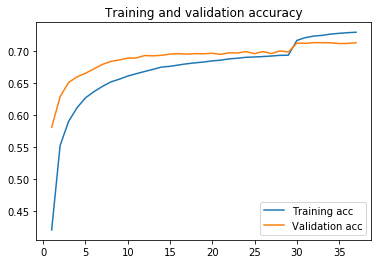

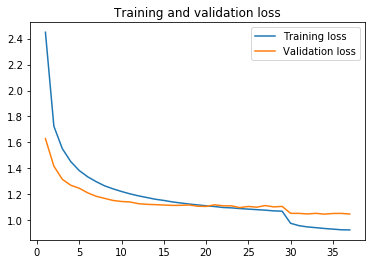

In [15]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss= history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,label='Training acc')
plt.plot(epochs,val_acc,label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,label='Training loss')
plt.plot(epochs,val_loss,label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# TEST 적용하기

하나의 그림을 가장 비슷한 그림으로 예측 되는 3개로 label 예측해보기

In [16]:
ttvlist=[]
reader=pd.read_csv('../input/test_simplified.csv',index_col=['key_id'],chunksize=2048)
for chunk in tqdm(reader,total=55):
    imagebag=bag.from_sequence(chunk.drawing.values).map(stroke_to_img)
    testarray=np.array(imagebag.compute())
    testarray=np.reshape(testarray,(testarray.shape[0],imheight,imwidth,1))
    testpreds=model.predict(testarray,verbose=0)
    ttvs=np.argsort(-testpreds)[:,0:3]
    ttvlist.append(ttvs)
ttvarray=np.concatenate(ttvlist)
pred_df=pd.DataFrame({'first': ttvarray[:,0],'second':ttvarray[:,1],'third':ttvarray[:,2]})
pred_df=pred_df.replace(numstonames)
pred_df['words']=pred_df['first']+' '+pred_df['second']+' '+pred_df['third']

sub=pd.read_csv('../input/sample_submission.csv',index_col=['key_id'])
sub['word']=pred_df.words.values
sub.to_csv('submission_summer.csv')

  0%|          | 0/55 [00:00<?, ?it/s]


OSError: [Errno 12] Cannot allocate memory